# Assignment 6 - Group Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Use cv2 functions only or atleast wherever possible.***

> **This assignment marks 1/3rd of your project. And hence, it is the first part of the final submission from your team.**







## Create a DataLoader Class

Use the pytorch docs sent on group and deepen your understanding using sample practice, or even AI.

Finally, create a dataloader for the Fruits-360 dataset ( https://www.kaggle.com/datasets/moltean/fruits ).
In <code>__getitem__</code> , include the processing to create LBP image, canny image, and find the 6 color features and 6 shape features.
Best implementation should include a proper division of tasks between the method itself and utility functions.
Also brainstorm about the data structures you use to process and pass the info. Use cv2 functions for best performance.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("moltean/fruits")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fruits' dataset.
Path to dataset files: /kaggle/input/fruits


In [ ]:
import os
# print(os.listdir(path))
folder=path+'/fruits-360_100x100/fruits-360'
train_folder=folder+'/Training'
test_folder=folder+'/Test'
print(os.listdir(train_folder))
print(os.listdir(test_folder))

['Melon Piel de Sapo 1', 'Dates 1', 'Avocado Black 2', 'Nectarine Flat 2', 'Apple Crimson Snow 1', 'Onion Red 1', 'Cherry Wax Yellow 1', 'Pear 10', 'Cherry 3', 'Avocado Green 1', 'Pear Red 1', 'Potato Red 1', 'Apple 7', 'Cucumber 8', 'Quince 4', 'Pear 12', 'Tomato Cherry Red 2', 'Apple Red 3', 'Huckleberry 1', 'Avocado 1', 'Blackberrie 1', 'Grape White 2', 'Tomato not Ripen 1', 'Tomato 9', 'Nut Pecan 1', 'Guava 1', 'Pear 9', 'Walnut 1', 'Apple 18', 'Tomato Maroon 1', 'Cherry Wax Red 1', 'Cucumber 1', 'Cucumber 6', 'Rambutan 1', 'Peach 4', 'Cactus fruit red 1', 'Pear 7', 'Cherry Rainier 2', 'Tomato Cherry Red 1', 'Cherry Sour 1', 'Nut 5', 'Pear 3', 'Pear 1', 'Strawberry 1', 'Potato Red Washed 1', 'Pear Monster 1', 'Apple worm 1', 'Cherry 4', 'Tomato Cherry Orange 1', 'Potato Sweet 1', 'Onion Red 2', 'Apple 5', 'Ginger Root 1', 'Cherry Rainier 3', 'Onion Red Peeled 1', 'Cucumber 5', 'Apple 17', 'Tomato 1', 'Pear Forelle 1', 'Cherry 2', 'Apple 13', 'Apple Red 2', 'Kohlrabi 1', 'Raspberry 

In [ ]:
# extract all labels=folder names in training
labels = sorted([
    d for d in os.listdir(train_folder)
    if os.path.isdir(os.path.join(train_folder, d))
])
print(f"Extracted {len(labels)} labels.")
class_to_idx = {label: i for i, label in enumerate(labels)}
print(class_to_idx)

Extracted 237 labels.
{'Apple 10': 0, 'Apple 11': 1, 'Apple 12': 2, 'Apple 13': 3, 'Apple 14': 4, 'Apple 17': 5, 'Apple 18': 6, 'Apple 19': 7, 'Apple 5': 8, 'Apple 6': 9, 'Apple 7': 10, 'Apple 8': 11, 'Apple 9': 12, 'Apple Braeburn 1': 13, 'Apple Core 1': 14, 'Apple Crimson Snow 1': 15, 'Apple Golden 1': 16, 'Apple Golden 2': 17, 'Apple Golden 3': 18, 'Apple Granny Smith 1': 19, 'Apple Pink Lady 1': 20, 'Apple Red 1': 21, 'Apple Red 2': 22, 'Apple Red 3': 23, 'Apple Red Delicious 1': 24, 'Apple Red Yellow 1': 25, 'Apple Red Yellow 2': 26, 'Apple Rotten 1': 27, 'Apple hit 1': 28, 'Apple worm 1': 29, 'Apricot 1': 30, 'Avocado 1': 31, 'Avocado Black 1': 32, 'Avocado Black 2': 33, 'Avocado Green 1': 34, 'Avocado ripe 1': 35, 'Banana 1': 36, 'Banana 3': 37, 'Banana 4': 38, 'Banana Lady Finger 1': 39, 'Banana Red 1': 40, 'Beans 1': 41, 'Beetroot 1': 42, 'Blackberrie 1': 43, 'Blackberrie 2': 44, 'Blackberrie half rippen 1': 45, 'Blackberrie not rippen 1': 46, 'Blueberry 1': 47, 'Cabbage red 1

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
# utility functions
def get_color_features(image):
    """
    Extracts 6 color features from an image.
    Returns: np.array([mean_h, std_h, mean_s, std_s, mean_v, std_v])
    """
    # convert BGR to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # cplit into 3 channels
    h, s, v = cv2.split(hsv)

    # calculate Mean and Standard Deviation for each
    mean_h, std_h = np.mean(h), np.std(h)
    mean_s, std_s = np.mean(s), np.std(s)
    mean_v, std_v = np.mean(v), np.std(v)

    # return as a normalized Float32 array (for PyTorch)
    feature_vector = np.array([mean_h, std_h, mean_s, std_s, mean_v, std_v], dtype=np.float32)

    return feature_vector


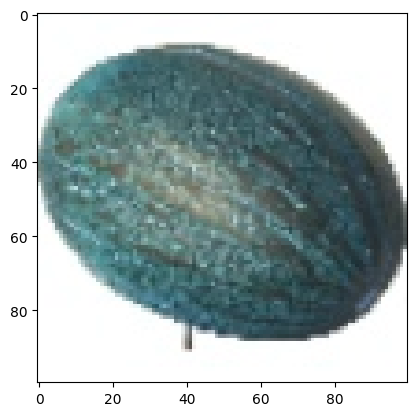

In [ ]:
# Test it
# os.listdir(train_folder+'/Melon Piel de Sapo 1')
img=cv2.imread(train_folder+'/Melon Piel de Sapo 1/r2_162_100.jpg')
plt.imshow(img)
plt.show()

In [ ]:
print(get_color_features(img))

[ 30.0357    28.675327  46.2698    42.128906 165.0641    73.67067 ]


In [ ]:
def get_processed_images(img):
    """
    Returns: canny_image, lbp_image
    """
    # convert to Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # canny edge map
    canny_image = cv2.Canny(gray, 100, 200)

   # LBP(from slide)

    lbp_image = np.zeros_like(gray, dtype=np.uint8)

    neighbors = [
        (-1, -1), (-1, 0), (-1, 1),
        (0, 1),   (1, 1),  (1, 0),
        (1, -1),  (0, -1)
    ]

    for i, (dy, dx) in enumerate(neighbors):
        shifted = np.roll(gray, dy, axis=0)
        shifted = np.roll(shifted, dx, axis=1)

        mask = (shifted >= gray)
        lbp_image += (mask.astype(np.uint8) << i)

    return canny_image, lbp_image

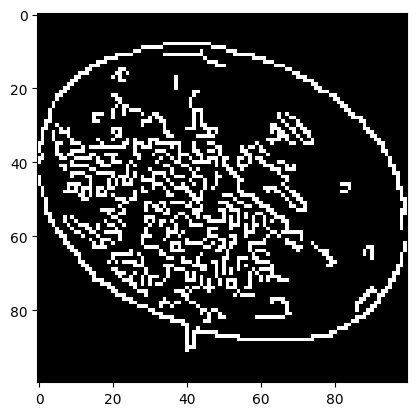

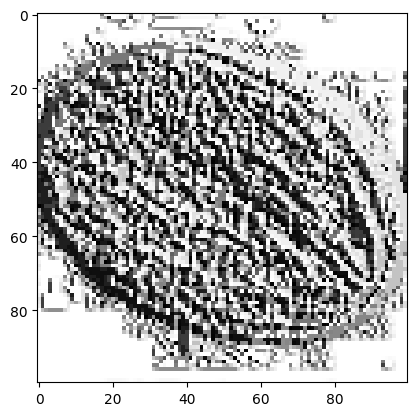

In [ ]:
# Test
canny,lbp=get_processed_images(img)
plt.imshow(canny,cmap='gray')
plt.show()
plt.imshow(lbp,cmap='gray')
plt.show()

In [ ]:
def get_shape_features(img):
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  # threshold to make background black and fruit white
  _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
  # find contours(onyl outermost contours)
  # contours store only key corner points to reduce memory usage
  contours,_=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  if not contours:
        # fallback if no contour is found
        return np.zeros(6, dtype=np.float32)
  # now we get (x,y) boundary points
  # now get largest contour by area
  c=max(contours,key=cv2.contourArea)
  area=cv2.contourArea(c)

  # feature 1: area ratio
  h,w=gray.shape
  area_ratio=area/(h*w)

  # feature 2: aspect ratio
  x,y,w,h=cv2.boundingRect(c)
  aspect_ratio=float(w)/h

  # feature 3: solidity
  hull=cv2.convexHull(c)
  hull_area=cv2.contourArea(hull)
  # prevent division by 0
  solidity=float(area)/hull_area if hull_area>0 else 0

  #feature 4: circularity
  # true ensures that perimeter is of closed figure(last point wraps back to first)
  perimeter=cv2.arcLength(c,True)
  if(perimeter>0):
    circularity=4*np.pi*(area/(perimeter**2))
  else:
    circularity=0

  # feature 5 & 6: hue moments on log scale
  moments=cv2.moments(c)
  hu_moments=cv2.HuMoments(moments)
  hu_feats=[]# stores log scale value of first 2 hus

  for i in range(2):
    val=hu_moments[i][0]
    if(val !=0):
      hu_feats.append(-1 * math.copysign(1.0, val) * math.log10(abs(val)))
    else:
      hu_feats.append(0)
   # pack into array and return
  return np.array([area_ratio,aspect_ratio,solidity,circularity,hu_feats[0],hu_feats[1]],dtype=np.float32)


In [ ]:
# Test
print(get_shape_features(img))

[0.6181     1.1904762  0.9676712  0.77900815 0.77639073 2.583131  ]


In [ ]:
# Create class
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
class FruitsDataset(Dataset):
  def __init__(self,root_dir,transform=None):
    self.root_dir=root_dir
    self.transform=transform
    self.samples=[]
    self.classes=[]

    # setup the data from directory
    if os.path.exists(root_dir):
      self.classes=sorted([d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir,d))])
      # map classes to indexs
      self.class_to_idx={label:i for i,label in enumerate(self.classes)}

      # Load all image paths categorized under their respective classes
      for cls_name in self.classes:
        cls_folder=os.path.join(root_dir,cls_name)
        cls_idx=self.class_to_idx[cls_name]

        for img_name in os.listdir(cls_folder):
          if(img_name.endswith(('.jpg','.jpeg','.png'))):
            img_path=os.path.join(cls_folder,img_name)
            self.samples.append((img_path,cls_idx))
    else:
      print(f"Error: Path {root_dir} does not exist!")

  def __len__(self):
        return len(self.samples)

  def __getitem__(self, idx):
    img_path,label=self.samples[idx]
    img_bgr=cv2.imread(img_path)
    if img_bgr is None:
      # if image fails, return the next one
      return self.__getitem__((idx + 1) % len(self))
    img_rgb=cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)


    # extract all features now
    # processed Images
    canny_img, lbp_img = self.get_processed_images(img_bgr)

    # linear Features
    color_feats = self.get_color_features(img_bgr)
    shape_feats = self.get_shape_features(img_bgr)

    # Combine linear features into one vector (12,)
    linear_features = np.concatenate([color_feats, shape_feats])

    # convert to tensor for pytorch processing
    to_tensor = transforms.ToTensor()

    img_tensor = to_tensor(img_rgb)
    canny_tensor = to_tensor(canny_img)
    lbp_tensor = to_tensor(lbp_img)

    features_tensor = torch.from_numpy(linear_features).float()
    label_tensor = torch.tensor(label, dtype=torch.long)

    return {
            'original': img_tensor,
            'canny': canny_tensor,
            'lbp': lbp_tensor,
            'features': features_tensor,
            'label': label_tensor
        }

  # Utility methods
  def get_color_features(self,image):
    """
    Extracts 6 color features from an image.
    Returns: np.array([mean_h, std_h, mean_s, std_s, mean_v, std_v])
    """
    # convert BGR to HSV
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # cplit into 3 channels
    h, s, v = cv2.split(hsv)

    # calculate Mean and Standard Deviation for each
    mean_h, std_h = np.mean(h), np.std(h)
    mean_s, std_s = np.mean(s), np.std(s)
    mean_v, std_v = np.mean(v), np.std(v)

    # return as a normalized Float32 array (for PyTorch)
    feature_vector = np.array([mean_h, std_h, mean_s, std_s, mean_v, std_v], dtype=np.float32)

    return feature_vector

  def get_processed_images(self,img):
    """
    Returns: canny_image, lbp_image
    """
    # convert to Grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # canny edge map
    canny_image = cv2.Canny(gray, 100, 200)

   # LBP(from slide)

    lbp_image = np.zeros_like(gray, dtype=np.uint8)

    neighbors = [
        (-1, -1), (-1, 0), (-1, 1),
        (0, 1),   (1, 1),  (1, 0),
        (1, -1),  (0, -1)
    ]

    for i, (dy, dx) in enumerate(neighbors):
        shifted = np.roll(gray, dy, axis=0)
        shifted = np.roll(shifted, dx, axis=1)

        mask = (shifted >= gray)
        lbp_image += (mask.astype(np.uint8) << i)

    return canny_image, lbp_image

  def get_shape_features(self,img):
    """
    Returns 6 shape features : [area_ratio,aspect_ratio,solidity,circularity,hu_feats[0],hu_feats[1]]
    """
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # threshold to make background black and fruit white
    _, thresh = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)
    # find contours(onyl outermost contours)
    # contours store only key corner points to reduce memory usage
    contours,_=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
          # fallback if no contour is found
          return np.zeros(6, dtype=np.float32)
    # now we get (x,y) boundary points
    # now get largest contour by area
    c=max(contours,key=cv2.contourArea)
    area=cv2.contourArea(c)

    # feature 1: area ratio
    h,w=gray.shape
    area_ratio=area/(h*w)

    # feature 2: aspect ratio
    x,y,w,h=cv2.boundingRect(c)
    aspect_ratio=float(w)/h

    # feature 3: solidity
    hull=cv2.convexHull(c)
    hull_area=cv2.contourArea(hull)
    # prevent division by 0
    solidity=float(area)/hull_area if hull_area>0 else 0

    #feature 4: circularity
    # true ensures that perimeter is of closed figure(last point wraps back to first)
    perimeter=cv2.arcLength(c,True)
    if(perimeter>0):
      circularity=4*np.pi*(area/(perimeter**2))
    else:
      circularity=0

    # feature 5 & 6: hue moments on log scale
    moments=cv2.moments(c)
    hu_moments=cv2.HuMoments(moments)
    hu_feats=[]# stores log scale value of first 2 hus

    for i in range(2):
      val=hu_moments[i][0]
      if(val !=0):
        hu_feats.append(-1 * math.copysign(1.0, val) * math.log10(abs(val)))
      else:
        hu_feats.append(0)
    # pack into array and return
    return np.array([area_ratio,aspect_ratio,solidity,circularity,hu_feats[0],hu_feats[1]],dtype=np.float32)




In [ ]:
# Initialize Dataset
dataset = FruitsDataset(root_dir=train_folder)

# Initialize DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True)

# Fetch one batch
data_batch = next(iter(dataloader))

print("Batch Loaded Successfully!")
print(f"Original Image Shape: {data_batch['original'].shape} (Batch, C, H, W)")
print(f"Canny Image Shape:    {data_batch['canny'].shape}")
print(f"LBP Image Shape:      {data_batch['lbp'].shape}")
print(f"Linear Features:      {data_batch['features'].shape} (Should be Batch x 12)")
print(f"Labels:               {data_batch['label']}")

Batch Loaded Successfully!
Original Image Shape: torch.Size([4, 3, 100, 100]) (Batch, C, H, W)
Canny Image Shape:    torch.Size([4, 1, 100, 100])
LBP Image Shape:      torch.Size([4, 1, 100, 100])
Linear Features:      torch.Size([4, 12]) (Should be Batch x 12)
Labels:               tensor([ 82,  16, 218, 210])


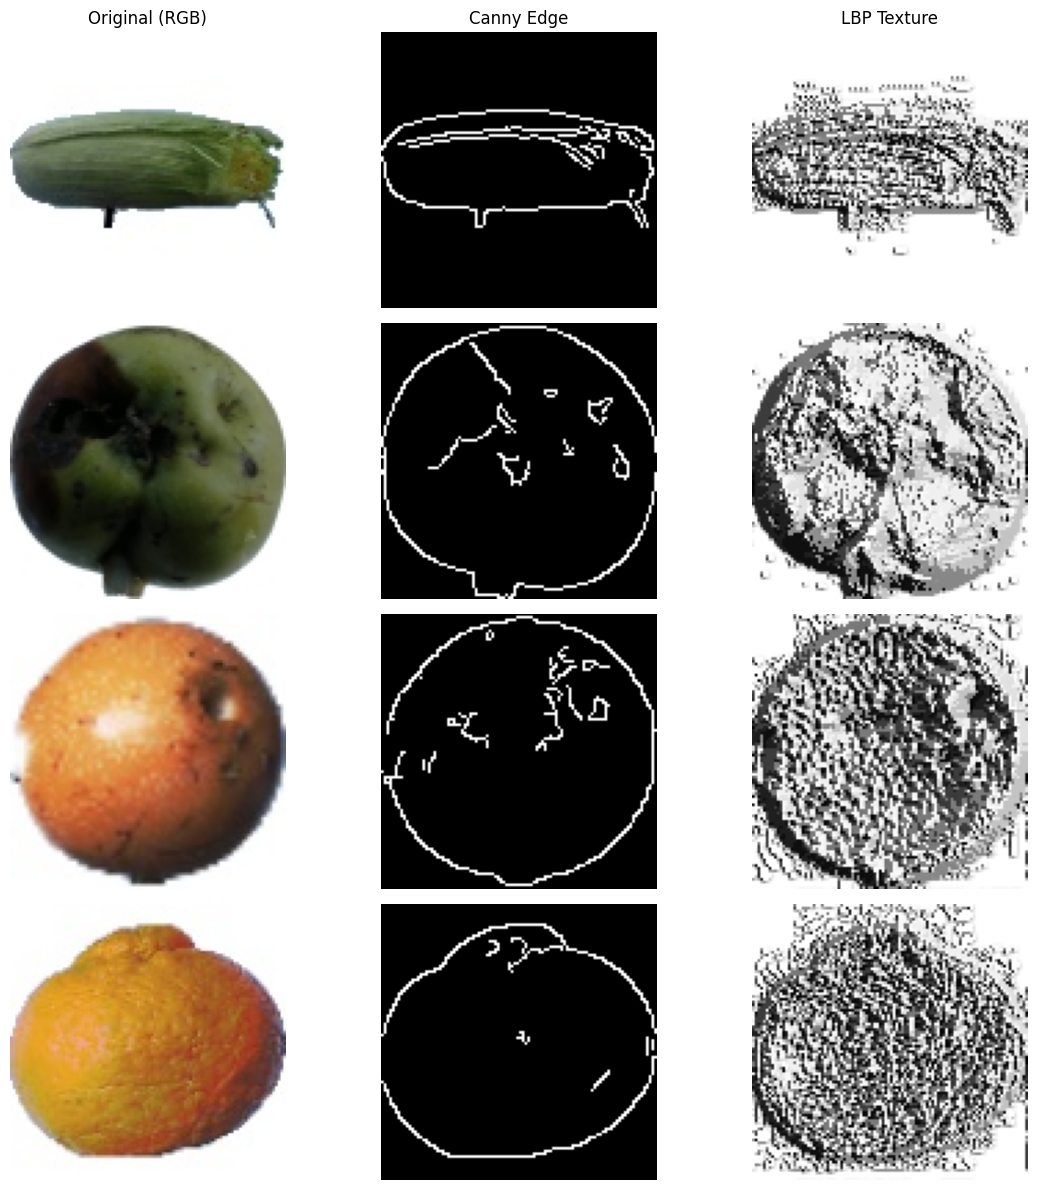

In [ ]:
 # Test more

# 1. Get a batch
data_iter = iter(dataloader)
batch = next(data_iter)

images = batch['original']
canny = batch['canny']
lbp = batch['lbp']
labels = batch['label']

# 2. Plotting Setup
fig, axs = plt.subplots(4, 3, figsize=(12, 12))
# Columns: Original | Canny | LBP
axs[0, 0].set_title("Original (RGB)")
axs[0, 1].set_title("Canny Edge")
axs[0, 2].set_title("LBP Texture")

for i in range(4): # Loop over batch size (4 images)
    # Original (Need to move channels to end: C,H,W -> H,W,C)
    axs[i, 0].imshow(images[i].permute(1, 2, 0))
    axs[i, 0].axis('off')

    # Canny (Grayscale, so just squeeze channel dim: 1,H,W -> H,W)
    axs[i, 1].imshow(canny[i].squeeze(), cmap='gray')
    axs[i, 1].axis('off')

    # LBP
    axs[i, 2].imshow(lbp[i].squeeze(), cmap='gray')
    axs[i, 2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
features = batch['features']
print(f"Feature Vector Shape: {features.shape} (Batch x 12)")

# Check for bad math (NaN or Inf)
if torch.isnan(features).any() or torch.isinf(features).any():
    print("ALERT: Found NaNs or Infinite values in features!")
    print(features)
else:
    print("Math Check Passed: No NaNs or Infinite values.")

# Print actual values for the first image to see if they make sense
print("\n--- Feature Sample (First Image in Batch) ---")
names = ["Mean Hue", "Std Hue", "Mean Sat", "Std Sat", "Mean Val", "Std Val",
         "Area Ratio", "Aspect Ratio", "Solidity", "Circularity", "Hu 1", "Hu 2"]

vals = features[0].numpy()
for name, val in zip(names, vals):
    print(f"{name:<15}: {val:.4f}")

Feature Vector Shape: torch.Size([4, 12]) (Batch x 12)
Math Check Passed: No NaNs or Infinite values.

--- Feature Sample (First Image in Batch) ---
Mean Hue       : 19.4243
Std Hue        : 35.1492
Mean Sat       : 101.3334
Std Sat        : 114.9412
Mean Val       : 198.7374
Std Val        : 63.8390
Area Ratio     : 0.4520
Aspect Ratio   : 1.6230
Solidity       : 0.9798
Circularity    : 0.7862
Hu 1           : 0.7431
Hu 2           : 2.1402
